# Brazil Medical: No Show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Original dataset provided by Joni Hoppen and Aquarela Analytics via [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Question(s) for Analysis

The primary question for analysis is "What groups of individuals are least likely to show up for their appointments?" 
- Do demographics impact likelithood?
    - Does affliction?
    - Facility process?
- Which months have the most No Shows?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [64]:
df = pd.read_csv('data/kaggleV2-may-2016.csv',
                parse_dates=['ScheduledDay', 'AppointmentDay'])

# Review columns & dtype
#print(df.info())

# Review column values
#print(df.head())

# Check for duplicates
#print("Duplicate Values: {}".format(sum(df.duplicated())))

**DATA REVIEW**
- No null values
- No duplicates
- Convert names to snake case
- Optimize data types
- Handicap has more than 0/1 values 

### Data Cleaning

In [11]:
# Rename columns
df.rename(columns=lambda s: s.lower().replace('day', '_day')
                                        .replace('id', '_id')
                                        .replace('-', '_')
                                        .replace('handcap', 'handicap'), inplace=True)

# Change data types
df.patient_id = df.patient_id.astype('string')
df.appointment_id = df.appointment_id.astype('string')
df.gender = df.gender.astype('category')
df.age = df.age.astype('int16')
df.neighbourhood = df.neighbourhood.astype('category')
df.scholarship = df.scholarship.astype('bool')
df.hipertension = df.hipertension.astype('bool')
df.diabetes = df.diabetes.astype('bool')
df.alcoholism = df.alcoholism.astype('bool')
df.sms_received = df.sms_received.astype('bool')
df.no_show = df.no_show == 'Yes'  

# Fix Handicap (had multiple non-bool values)
df.handicap = df.handicap > 0

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  string             
 1   appointment_id   110527 non-null  string             
 2   gender           110527 non-null  category           
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int16              
 6   neighbourhood    110527 non-null  category           
 7   scholarship      110527 non-null  bool               
 8   hipertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handicap         110527 non-null  bool               
 12  sms_received     110527 non-null  bool               
 13 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What groups of individuals are least likely to show up for their appointments?

ValueError: Could not interpret input 'no_show'

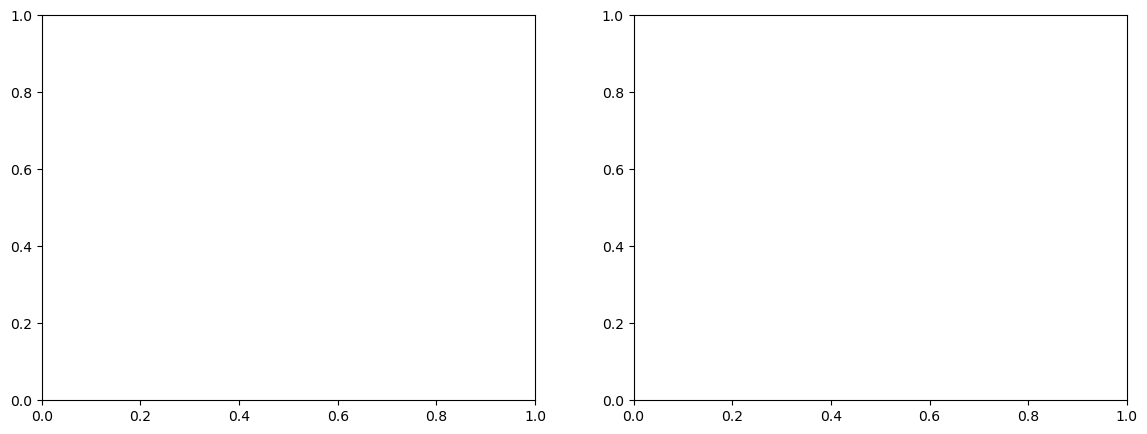

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5));
sns.countplot(data=df, x='no_show', hue='gender', palette=['#432371',"#FAAE7B"], ax=ax1);
ax1.set_title('Gender No Shows');

prop = df.groupby('gender').no_show.value_counts(normalize=True)
prop = prop.reset_index()
sns.barplot(data=prop, x='no_show', y='proportion', hue='gender', palette=['#432371',"#FAAE7B"], ax=ax2);
ax2.set_title('Proportion of Gender');

A review of no shows by gender reveals that woman visit the hospital nearly twice as often as men, but one gender doesn't "no-show" more than the other.

### Research Question 2: Which months have the most No Shows?

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
   index  scheduled_day  no_show
0      0              0       18
1      1              1       82
2      2              2     1196
3      3              3     7849
4      4              4    11769
5      5              5     1386
6      6             10        0
7      7             11       19


/home/tristenwallace/anaconda3/envs/udacity/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tristenwallace/anaconda3/envs/udacity/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

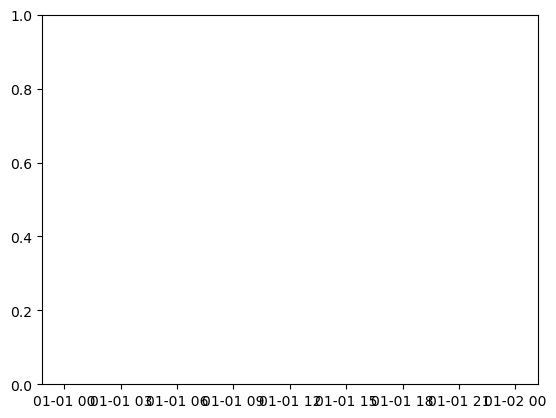

In [39]:
from calendar import month_name as mn

# month list
months = mn[1:]
print(months)
df_m = df.groupby(df.scheduled_day.dt.month)['no_show'].sum()
df_m = month_count.reset_index()
df_m.scheduled_day = df_m.scheduled_day - 1
print(df_m)
sns.lineplot(data=df,x='scheduled_day',y='no_show')

<a id='conclusions'></a>
## Conclusions